# Analysis

In [1]:
import pandas as pd
import plotnine as pn


In [11]:
# Load data

# Pareto frontier
curve_fn = "/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/curve_points.csv"

# Explored hypothetical systems
sampled_data = "/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/sampled_points.csv"

# simulation points
alphas = [0, 2, 4, 6, 8, 10]
alpha_fns = {
    f"{alpha}":f"/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/dynamics=reinforcement_learning/num_trials=10/sim_param={alpha}/simulation_points.csv"
    for alpha in alphas
}



In [12]:
# load dataframes
curve_data = pd.read_csv(curve_fn)

simulation_dataframes = {
    k: pd.read_csv(alpha_fns[k]) for k in alpha_fns
}

In [13]:
# combine simulation dataframes
for key in simulation_dataframes:
    df = simulation_dataframes[key]
    df["alpha"] = key # use string for category

sim_data = pd.concat(simulation_dataframes.values())
sim_data

,rate,distortion,alpha
0,2.972324,0.997358,0
1,2.883943,1.362728,0
2,2.889300,0.246515,0
3,2.815523,6.080254,0
4,3.072201,0.957857,0
5,2.889894,1.068939,0
6,3.276343,0.068807,0
7,3.023678,2.054954,0
8,3.097138,3.619052,0
9,2.999387,4.224398,0


/Users/nathanielimel/miniforge3/envs/rdsg/lib/python3.10/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


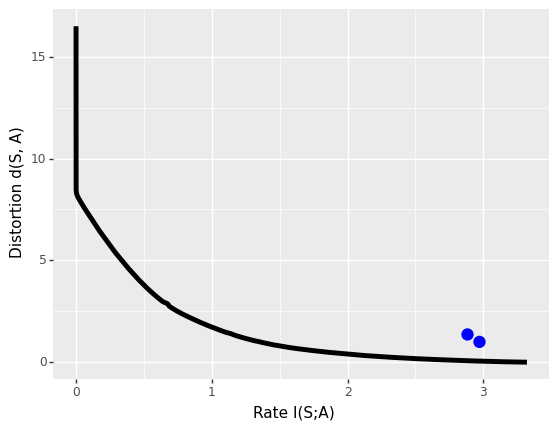

In [4]:
# plot each language, with a unique color for each gamma

# TODO: get beta-counterparts

sim_data = sim_data.assign(
        gamma=pd.Categorical(
            sim_data["gamma"], 
            categories=[g for g in simulation_dataframes.keys()]
        )
    )  # preserve order in legend

sim_data["language"] = "learned" # or 'evolved'
sampled_data["language"] = "hypothetical"
